## 1. Download data

url: https://archive.ics.uci.edu/static/public/477/real+estate+valuation+data+set.zip

## 2. Import library and read data

In [713]:
import pandas as pd
import numpy as np
df = pd.read_excel('data/Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Data Exploration

In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [715]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [716]:
df.isnull().sum() # check missing value

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Visualize

In [717]:
import os
def savefig(figure, filename):
    if not os.path.exists('images'):
        os.makedirs('images')
    filename = f'images/{filename}'
    figure.savefig(filename)

/tmp/ipykernel_123582/2594224625.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins = 50, figsize=(18, 10), ax = ax)


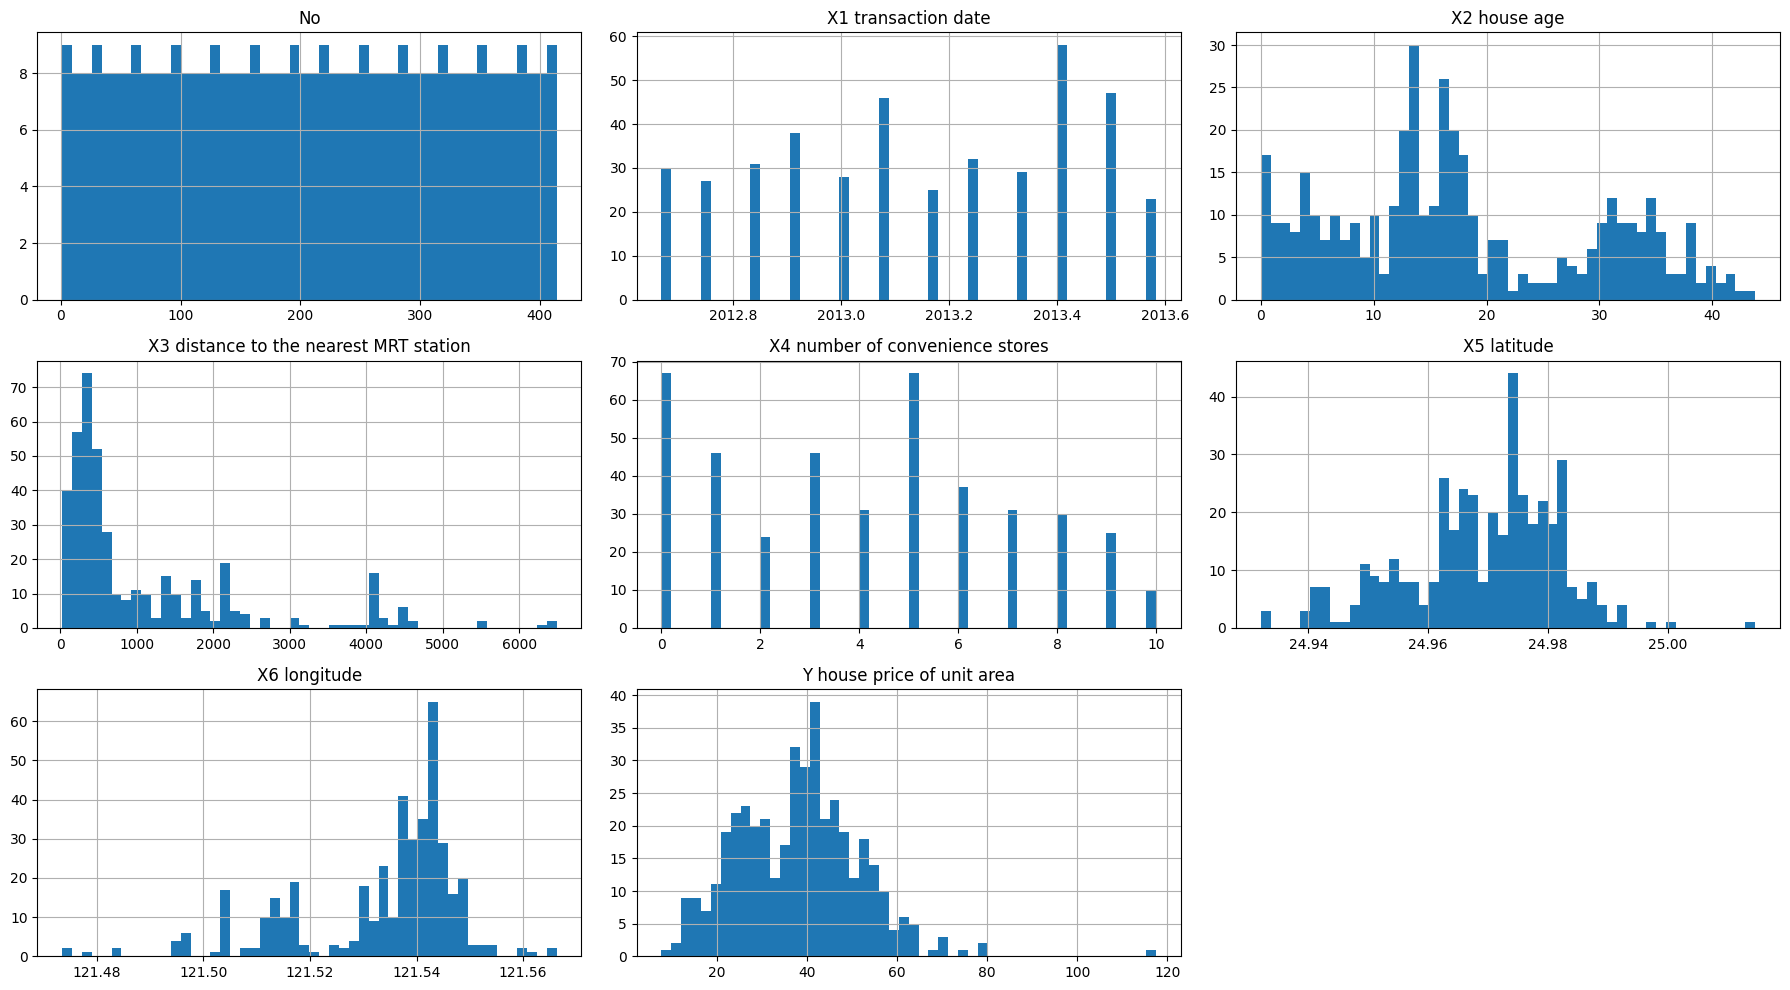

In [718]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 10))
df.hist(bins = 50, figsize=(18, 10), ax = ax)
savefig(fig, 'histograms.png')
plt.tight_layout()
plt.show()

In [719]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

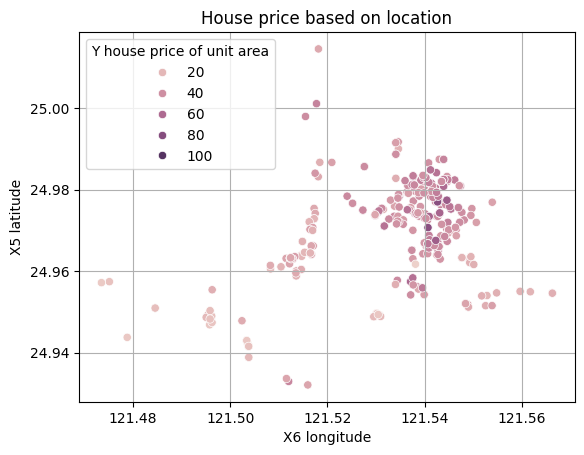

In [720]:
import seaborn as sns
sns.scatterplot(data = df, x = 'X6 longitude', y = 'X5 latitude', hue = 'Y house price of unit area')
plt.title('House price based on location')
savefig(plt, 'House price based on location.png')
plt.grid(True)
plt.show()

In [721]:
# drop outliers
df = df[df['X5 latitude'] <= 25]

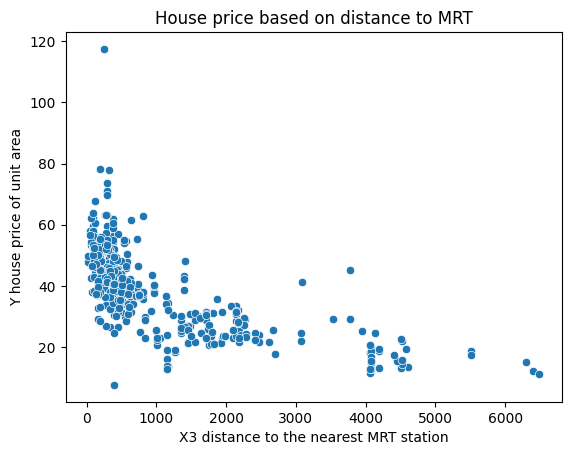

In [722]:
sns.scatterplot(data=df, x='X3 distance to the nearest MRT station', y='Y house price of unit area')
plt.title('House price based on distance to MRT')
savefig(plt, 'House price based on distance to MRT.png')
plt.show()

In [723]:
# drop outliers
df = df[df['Y house price of unit area'] <= 110]

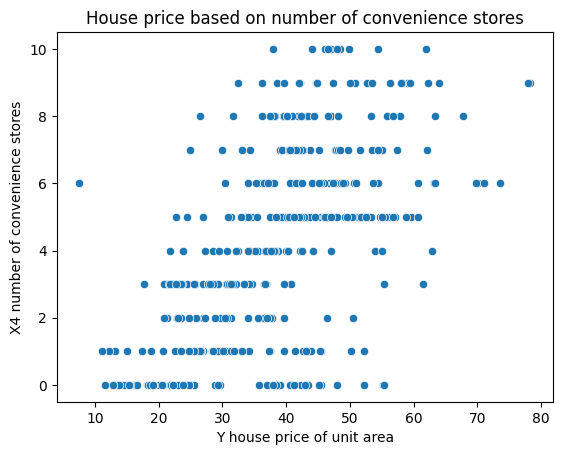

In [724]:
sns.scatterplot(data=df, y='X4 number of convenience stores', x='Y house price of unit area')
plt.title('House price based on number of convenience stores')
savefig(plt, 'House price based on number of convenience stores.png')
plt.show()

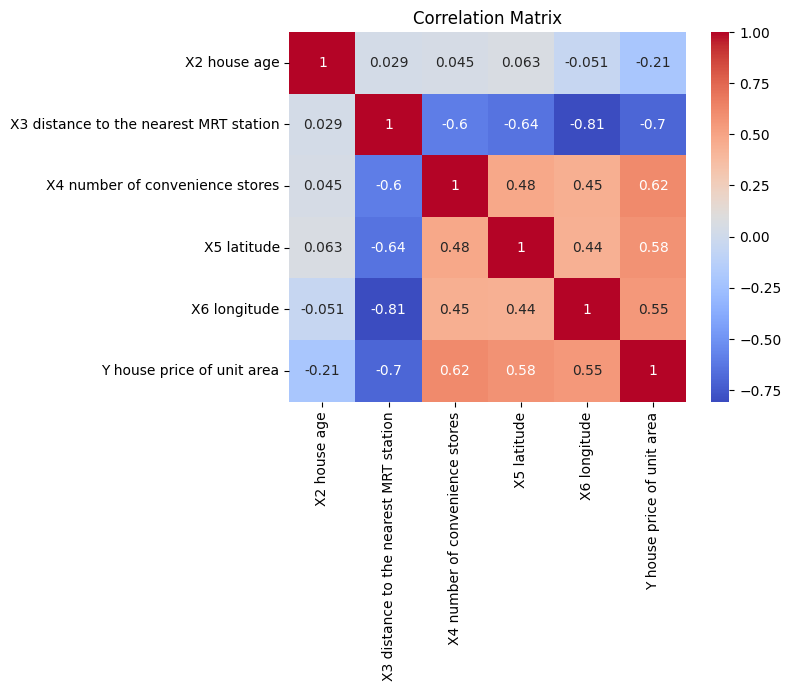

In [725]:
# make corr matrix
corr_matrix = df.corr()
# plot corr matrix
# remove attributes: "No", "X1 transaction date"
corr_matrix = df.drop(['No', 'X1 transaction date'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
savefig(plt, 'correlation_matrix.png')
plt.show()

## Data Preprocessing And Feature Engineer

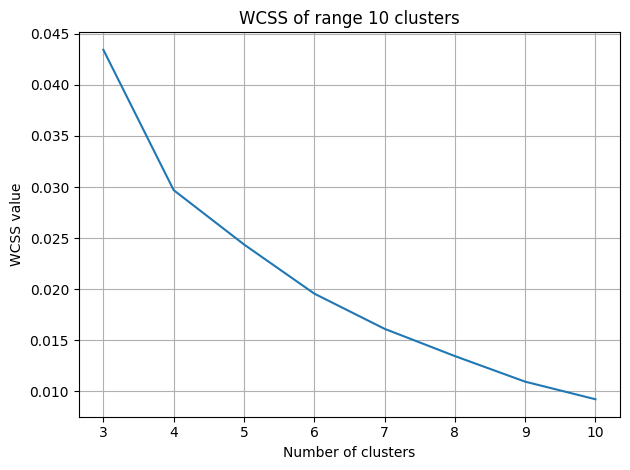

In [726]:
# clustering location
from sklearn.cluster import KMeans

wcss = []
for K in range(3,11):
    kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df[['X6 longitude', 'X5 latitude']])
    wcss.append(kmeans.inertia_)

# plot WCSS
plt.plot(range(3, 11), wcss)
plt.title('WCSS of range 10 clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.grid(True)
plt.tight_layout()
savefig(plt, 'WCSS.png')
plt.show()

Chọn 2 là K clusters

In [727]:
K = 2

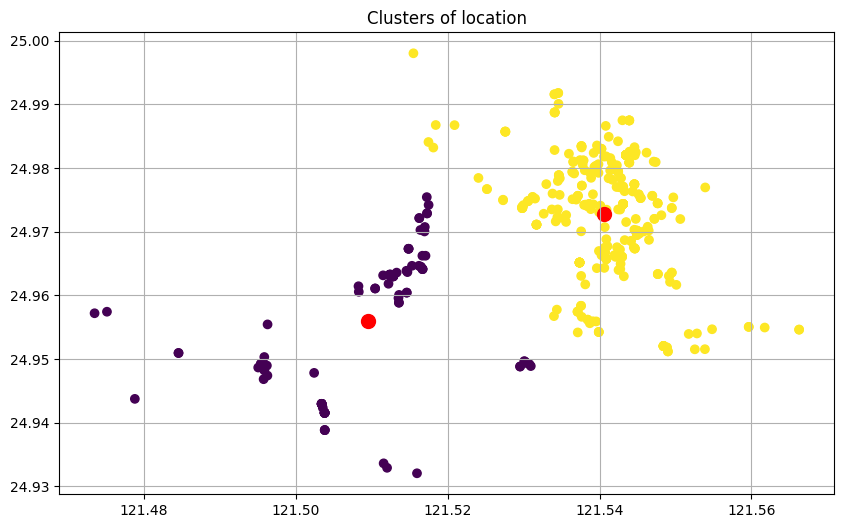

In [728]:
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
kmeans.fit(df[['X6 longitude', 'X5 latitude']])
clusters = kmeans.cluster_centers_
# plot clusters
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.scatter(df['X6 longitude'], df['X5 latitude'], c=kmeans.labels_)
plt.scatter(clusters[:, 0], clusters[:, 1], s=100, c='red')
plt.title('Clusters of location')
savefig(plt, 'clusters.png')
plt.show()

In [729]:
print(clusters) # make sure the cluster is ascending

[[121.50952263  24.95594547]
 [121.54063437  24.97270028]]


In [730]:
# add clusters to df
df['clusters'] = kmeans.labels_

In [731]:
# make a new feature of distance to the nearest MRT station
df['distance_cat'] = pd.cut(df['X3 distance to the nearest MRT station'], bins=[0, 500, 3000, 5000, np.infty], labels=['closest', 'a_bit_close', 'far', 'very_far'])

In [732]:
# Select features
num_features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude']
cat_features = ['clusters', 'distance_cat']

X = df[num_features + cat_features].values
y = df['Y house price of unit area'].values

In [733]:
X

array([[32.0, 84.87882, 24.98298, 121.54024, 1, 'closest'],
       [19.5, 306.5947, 24.98034, 121.53951, 1, 'closest'],
       [13.3, 561.9845, 24.98746, 121.54391, 1, 'a_bit_close'],
       ...,
       [18.8, 390.9696, 24.97923, 121.53986, 1, 'closest'],
       [8.1, 104.8101, 24.96674, 121.54067, 1, 'closest'],
       [6.5, 90.45606, 24.97433, 121.5431, 1, 'closest']], dtype=object)

In [734]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2, -1])], remainder='passthrough')
X_transformed = ct.fit_transform(X)

In [735]:
X_transformed[:4]

array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 32.0, 84.87882, 24.98298,
        121.54024],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 19.5, 306.5947, 24.98034,
        121.53951],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 13.3, 561.9845, 24.98746,
        121.54391],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 13.3, 561.9845, 24.98746,
        121.54391]], dtype=object)

In [736]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
print(f'Train size: {len(X_train)}')
print(f'Test size: {len(X_test)}')

Train size: 328
Test size: 83


In [737]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, K + 4:] = sc.fit_transform(X_train[:, K + 4:])
X_test[:, K + 4:] = sc.transform(X_test[:, K + 4:])

In [738]:
X_train[:4]

array([[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.8888013835232703,
        -0.444018689377152, -0.48830360012830676, 0.6214027367770141],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, -0.1135577973349826,
        2.001183305654181, -3.1105576678706717, -1.1490406249899623],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, -1.1070465429644014,
        0.40341191581572583, 0.28683877306574573, -1.1295351894942711],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, -1.4618639521177652,
        -0.7048290209597755, -0.25762665755848285, 0.4712108834655521]],
      dtype=object)

In [739]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,clusters,distance_cat
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,1,closest
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,1,closest
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,1,a_bit_close
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,1,a_bit_close
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,1,closest


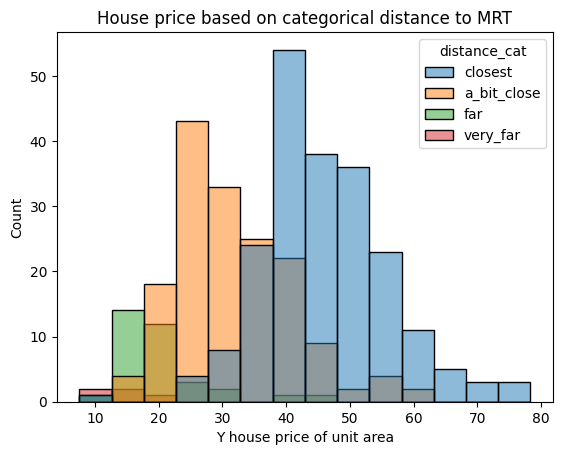

In [740]:
sns.histplot(data=df, hue='distance_cat', x='Y house price of unit area')
plt.title('House price based on categorical distance to MRT')
savefig(plt, 'House price based on categorical distance to MRT.png')
plt.show()

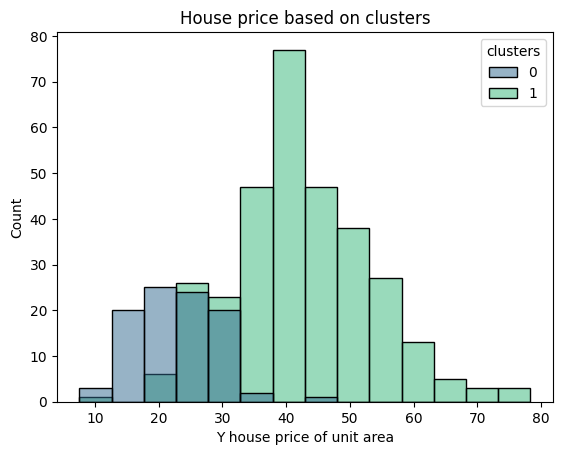

In [741]:
sns.histplot(data=df, hue='clusters', x='Y house price of unit area', palette='viridis')
plt.title('House price based on clusters')
savefig(plt, 'House price based on clusters.png')
plt.show()

## Train a Regression model

In [742]:
(X_train.shape, y_train.shape)

((328, 10), (328,))

In [743]:
(X_test.shape, y_test.shape)

((83, 10), (83,))

In [744]:
# use Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [745]:
# use Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

lasso = Lasso()
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'max_iter': [1000, 2000, 3000, 4000, 5000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_iter': [1000, 2000, 3000, 4000, 5000]},
             scoring='neg_mean_squared_error')

In [746]:
# use Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

## Evaluate with RMSE metric

In [747]:
# predict
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_lin = lin_reg.predict(X_test)

In [748]:
lasso_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
ridge_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
lin_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})

In [749]:
lasso_pred.to_csv('data/lasso_pred.csv', index=False)
ridge_pred.to_csv('data/ridge_pred.csv', index=False)
ridge_pred.to_csv('data/ridge_pred.csv', index=False)

In [750]:
# print max different of pair of datafarame
print(lasso_pred['Actual'].sub(lasso_pred['Predicted']).abs().max())
print(ridge_pred['Actual'].sub(ridge_pred['Predicted']).abs().max())
print(lin_pred['Actual'].sub(lin_pred['Predicted']).abs().max())

27.60957050381556
26.548216217092197
26.486102983346697


In [751]:
# calculate metric
## RMSE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lin = mean_squared_error(y_test, y_pred_lin)
## R-squared
from sklearn.metrics import r2_score
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Mean Squared Error of Lasso: {mse_lasso}')
print(f'Mean Squared Error of Ridge: {mse_ridge}')
print(f'Mean Squared Error of Linear Regression: {mse_lin}')
print(f'R-squared of Lasso: {r2_lasso}')
print(f'R-squared of Ridge: {r2_ridge}')
print(f'R-squared of Linear Regression: {r2_lin}')

Mean Squared Error of Lasso: 60.82958341812741
Mean Squared Error of Ridge: 58.691983607488126
Mean Squared Error of Linear Regression: 58.65737419528206
R-squared of Lasso: 0.6165060698412406
R-squared of Ridge: 0.6299823507299963
R-squared of Linear Regression: 0.6302005422539487


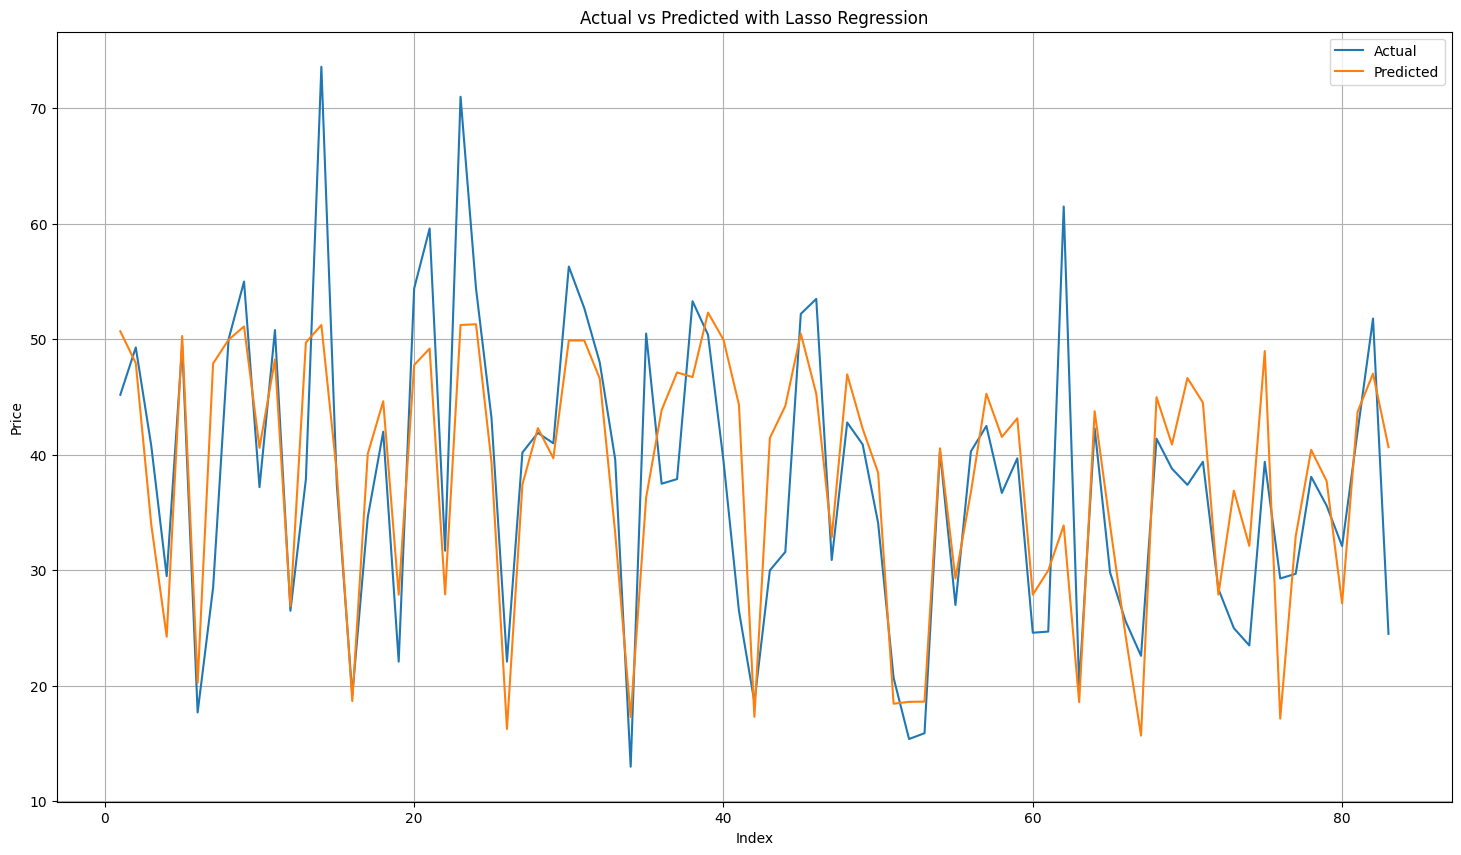

In [752]:
x_bar = range(1,84)
plt.figure(figsize=(18, 10))
plt.plot(x_bar, y_test[:83], label='Actual')
plt.plot(x_bar, y_pred_lasso[:83], label='Predicted')
plt.title('Actual vs Predicted with Lasso Regression')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
savefig(plt, 'actual_vs_predicted_lasso.png')
plt.show()

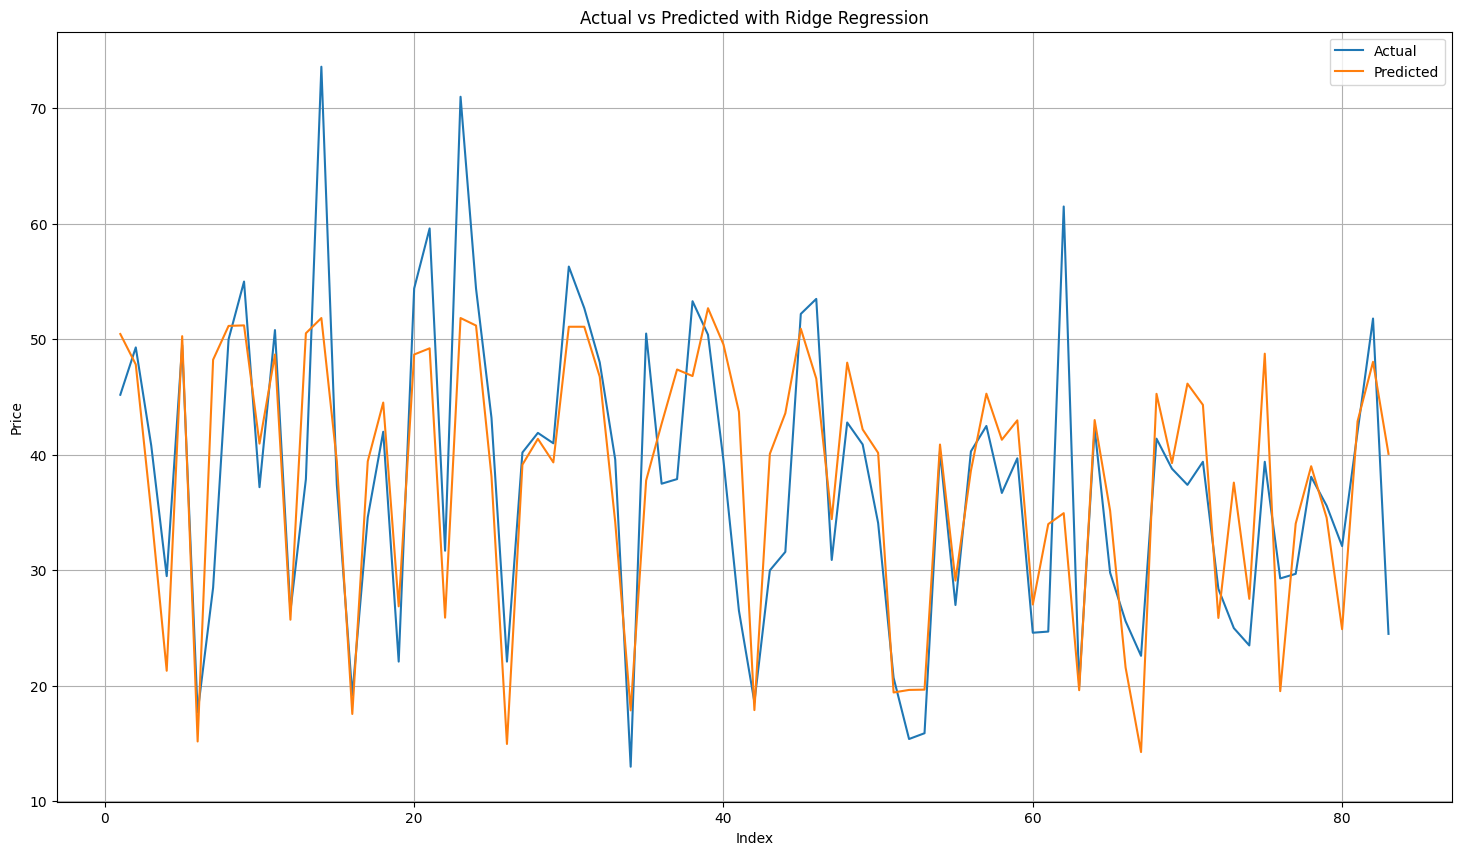

In [753]:
plt.figure(figsize=(18, 10))
plt.plot(x_bar, y_test[:83], label='Actual')
plt.plot(x_bar, y_pred_ridge[:83], label='Predicted')
plt.title('Actual vs Predicted with Ridge Regression')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
savefig(plt, 'actual_vs_predicted_ridge.png')
plt.show()

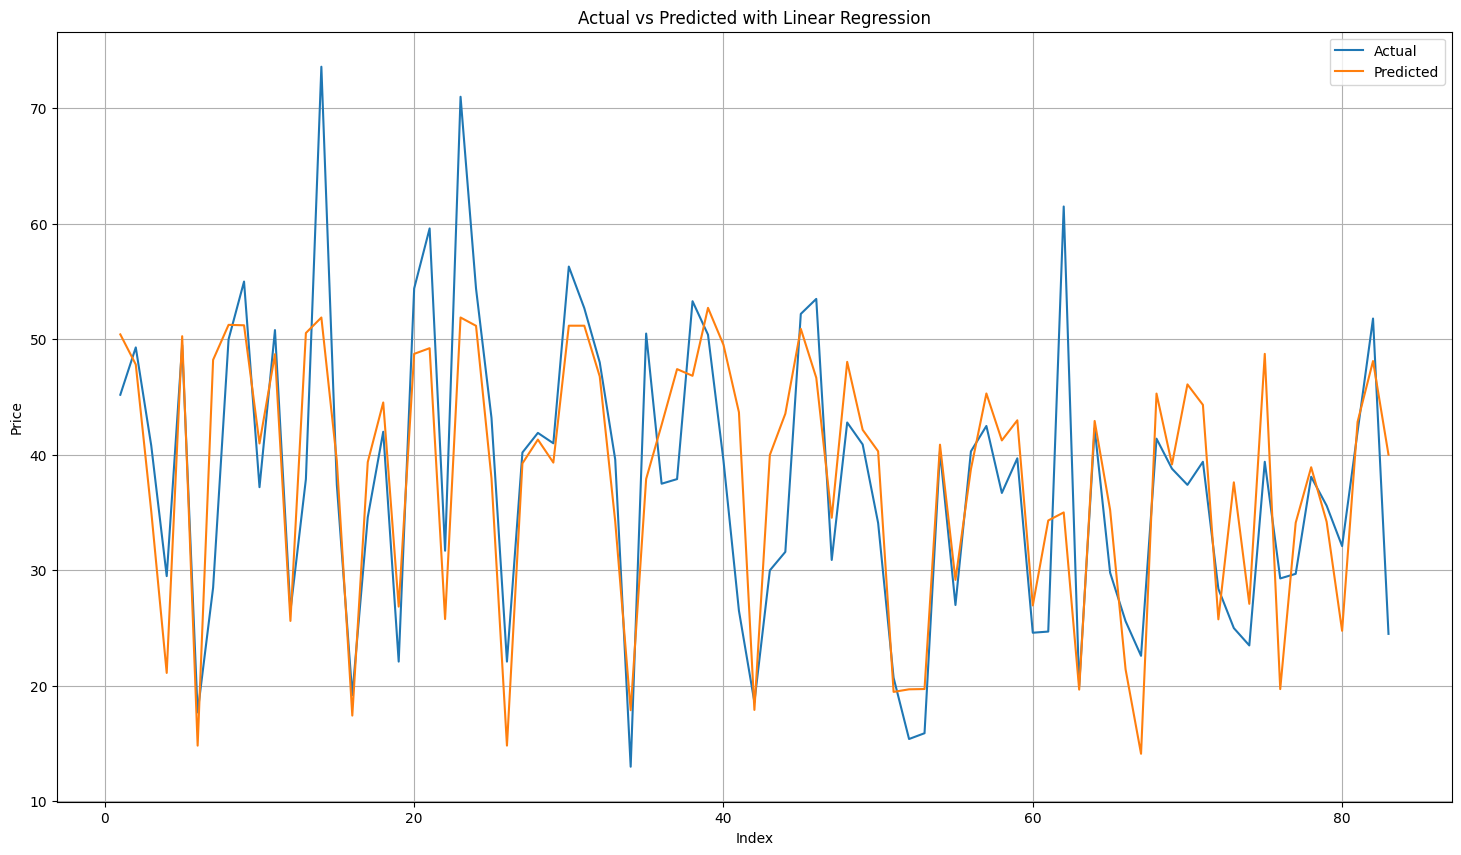

In [754]:
plt.figure(figsize=(18, 10))
plt.plot(x_bar, y_test[:83], label='Actual')
plt.plot(x_bar, y_pred_lin[:83], label='Predicted')
plt.title('Actual vs Predicted with Linear Regression')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
savefig(plt, 'actual_vs_predicted_linear.png')
plt.show()